In [432]:
#imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [433]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [434]:
credit = pd.read_csv('credit2.csv')

In [435]:
credit.head()

,Unnamed: 0,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,...,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default,Age_Decade,Limit_Bins
0,0,20000,1,24,2,2,-1,-1,-2,-2,...,1,0,0,0,0,1,1,0,20,10-50K
1,1,120000,2,26,-1,2,0,0,0,2,...,1,0,0,0,0,1,1,0,20,100-150K
2,2,90000,2,34,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,30,50-100K
3,3,50000,1,37,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,30,10-50K
4,4,50000,1,57,-1,0,-1,0,0,0,...,0,1,0,0,0,1,0,1,50,10-50K


In [436]:
credit.drop('Unnamed: 0', axis=1, inplace=True)

In [437]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Limit_Bal                   2396 non-null   int64 
 1   Marriage                    2396 non-null   int64 
 2   Age                         2396 non-null   int64 
 3   Status_Sept                 2396 non-null   int64 
 4   Status_Aug                  2396 non-null   int64 
 5   Status_Jul                  2396 non-null   int64 
 6   Status_Jun                  2396 non-null   int64 
 7   Status_May                  2396 non-null   int64 
 8   Status_Apr                  2396 non-null   int64 
 9   Bill_Sept                   2396 non-null   int64 
 10  Bill_Aug                    2396 non-null   int64 
 11  Bill_Jul                    2396 non-null   int64 
 12  Bill_Jun                    2396 non-null   int64 
 13  Bill_May                    2396 non-null   int6

In [438]:
credit["Age_Decade"] = credit["Age_Decade"].astype("category")

In [439]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Limit_Bal                   2396 non-null   int64   
 1   Marriage                    2396 non-null   int64   
 2   Age                         2396 non-null   int64   
 3   Status_Sept                 2396 non-null   int64   
 4   Status_Aug                  2396 non-null   int64   
 5   Status_Jul                  2396 non-null   int64   
 6   Status_Jun                  2396 non-null   int64   
 7   Status_May                  2396 non-null   int64   
 8   Status_Apr                  2396 non-null   int64   
 9   Bill_Sept                   2396 non-null   int64   
 10  Bill_Aug                    2396 non-null   int64   
 11  Bill_Jul                    2396 non-null   int64   
 12  Bill_Jun                    2396 non-null   int64   
 13  Bill_May          

In [440]:
credit["Limit_Bins"] = credit["Limit_Bins"].astype("category")

In [441]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Limit_Bal                   2396 non-null   int64   
 1   Marriage                    2396 non-null   int64   
 2   Age                         2396 non-null   int64   
 3   Status_Sept                 2396 non-null   int64   
 4   Status_Aug                  2396 non-null   int64   
 5   Status_Jul                  2396 non-null   int64   
 6   Status_Jun                  2396 non-null   int64   
 7   Status_May                  2396 non-null   int64   
 8   Status_Apr                  2396 non-null   int64   
 9   Bill_Sept                   2396 non-null   int64   
 10  Bill_Aug                    2396 non-null   int64   
 11  Bill_Jul                    2396 non-null   int64   
 12  Bill_Jun                    2396 non-null   int64   
 13  Bill_May          

In [442]:
X = credit.iloc[:, np.r_[1:2, 21:28]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default
0,1,1,0,0,0,0,1,1
1,2,1,0,0,0,0,1,1
2,2,1,0,0,0,0,1,0
3,1,1,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0


In [443]:
y = credit['Limit_Bal']

In [444]:
y

0        20000
1       120000
2        90000
3        50000
4        50000
         ...  
2391     50000
2392     20000
2393    130000
2394    110000
2395    200000
Name: Limit_Bal, Length: 2396, dtype: int64

In [445]:
model = LinearRegression()

In [446]:
print(cross_val_score(model, X, y, cv=3)) 

[0.05603549 0.09127826 0.11773951]


In [447]:
algosClass = []

In [448]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [449]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [450]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.09005802926975237
Linear Regression 0.08835108361636439
Support Vector Regression -0.03982525498324615


# CHANGING FEATURE SELECTION TO ENTIRE DATA FRAME

In [451]:
X = credit.iloc[:, 1:28]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,Bill_Aug,...,Pay_Jun,Pay_May,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


In [452]:
y = credit['Limit_Bal']

In [453]:
model = LinearRegression()

In [454]:
print(cross_val_score(model, X, y, cv=3)) 

[0.34765498 0.34489531 0.42749085]


In [455]:
algosClass = []

In [456]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [457]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [458]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4369060312729854
Linear Regression 0.3733470445513361
Support Vector Regression -0.0395496835037481


In [459]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [460]:
algo = RandomForestRegressor()

In [461]:
model = algo.fit(X_train,y_train)

In [462]:
predictions = model.predict(X_test)

In [463]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [464]:
from math import sqrt

In [465]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [466]:
predRsquared = r2_score(y_test,predictions)

In [467]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.407
RMSE: 99718.415


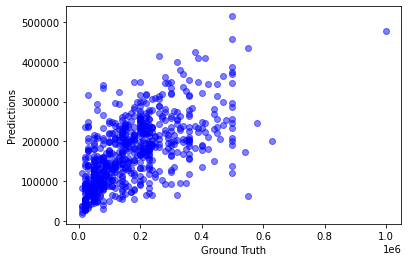

In [468]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# SWITCHING TO CLASSIFICATION ALGORITHM

In [469]:
#Features
X = credit.iloc[:, np.r_[1:2, 21:28]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default
0,1,1,0,0,0,0,1,1
1,2,1,0,0,0,0,1,1
2,2,1,0,0,0,0,1,0
3,1,1,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0


In [470]:
credit['Limit_Bins']=credit['Limit_Bins'].astype('str')

In [471]:
y = credit['Limit_Bins']

In [472]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [473]:
#Modeling (Classification)
dtalgo = DecisionTreeClassifier()
dtmodel = dtalgo.fit(X_train,y_train)

In [474]:
#Predictions
preds = dtmodel.predict(X_test)

In [475]:
#dependent variable
print(y)

0         10-50K
1       100-150K
2        50-100K
3         10-50K
4         10-50K
          ...   
2391      10-50K
2392      10-50K
2393    100-150K
2394    100-150K
2395    150-200K
Name: Limit_Bins, Length: 2396, dtype: object


In [476]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      10-50K       0.30      0.80      0.43       173
    100-150K       0.33      0.01      0.02       104
         10K       0.00      0.00      0.00         7
    150-200K       0.07      0.08      0.07        90
    200-250K       0.00      0.00      0.00        87
    250-300K       0.00      0.00      0.00        46
       300K+       0.25      0.37      0.30       102
     50-100K       0.00      0.00      0.00       109
         nan       0.00      0.00      0.00         1

    accuracy                           0.26       719
   macro avg       0.11      0.14      0.09       719
weighted avg       0.16      0.26      0.16       719



C:\Users\dfish\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dfish\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dfish\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [477]:
from sklearn.tree import plot_tree

In [478]:
#fig = plt.figure(figsize=(25,20), dpi=250)
#tree = plot_tree(dtmodel, fontsize=12, feature_names=X.columns,class_names=['10K','10-50K', '50-100K', '100-150K', '150-200K', '200-250K', '250-300K', '300K+'], max_depth=7, filled=True)

# SWITCHING INDEPENDENT VARIABLE TO DEFAULT STATUS

In [479]:
X = credit.iloc[:, 1:26]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,Bill_Aug,...,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,689,0,0,0,0,1,0,0,0,0
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,1000,0,2000,1,0,0,0,0
2,2,34,0,0,0,0,0,0,29239,14027,...,1500,1000,1000,1000,5000,1,0,0,0,0
3,1,37,0,0,0,0,0,0,46990,48233,...,2019,1200,1100,1069,1000,1,0,0,0,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,36681,10000,9000,689,679,0,1,0,0,0


In [480]:
y = credit['Default_Status_default']

In [481]:
#dependent variable
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
2391    1
2392    0
2393    0
2394    0
2395    0
Name: Default_Status_default, Length: 2396, dtype: int64


In [482]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [483]:
#Modeling (Classification)
dtalgo1 = DecisionTreeClassifier()
dtmodel1 = dtalgo1.fit(X_train,y_train)

In [484]:
#Predictions
preds = dtmodel1.predict(X_test)

In [485]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       572
           1       0.34      0.38      0.36       147

    accuracy                           0.72       719
   macro avg       0.59      0.60      0.59       719
weighted avg       0.73      0.72      0.73       719



In [486]:
cross_model = DecisionTreeClassifier()

In [487]:
print(cross_val_score(cross_model, X, y, cv = 3))

[0.72715895 0.69837297 0.71303258]


In [488]:
dtalgo2= RandomForestClassifier(max_depth=20, )
model_credit = dtalgo2.fit(X_train,y_train)
#Predictions
preds_credit= model_credit.predict(X_test)
print(classification_report(y_test, preds_credit))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       572
           1       0.67      0.29      0.40       147

    accuracy                           0.82       719
   macro avg       0.75      0.62      0.65       719
weighted avg       0.80      0.82      0.80       719



In [489]:
cross_model2 = RandomForestClassifier()

In [490]:
print(cross_val_score(cross_model2, X, y, cv = 3))

[0.79974969 0.78848561 0.80325815]


In [491]:
dtalgo3= GradientBoostingClassifier()
model_credit = dtalgo3.fit(X_train,y_train)
#Predictions
preds_credit= model_credit.predict(X_test)
print(classification_report(y_test, preds_credit))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       572
           1       0.64      0.31      0.41       147

    accuracy                           0.82       719
   macro avg       0.74      0.63      0.66       719
weighted avg       0.80      0.82      0.80       719



In [492]:
cross_model3 = GradientBoostingClassifier()

In [493]:
print(cross_val_score(cross_model3, X, y, cv = 3))

[0.80475594 0.79974969 0.81578947]


In [494]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

In [495]:
results = []
names = []
for name, cross_model in algos_Class:
        result = cross_val_score(cross_model, X, y, cv = 3,
    scoring = 'accuracy')
        names.append(name)
        results.append(result)

In [496]:
for i in range(len(names)):
    print(names[i])
    print(results[i].mean())

Random Forest Classifier
0.7975785312258535
Decision Tree Classifier
0.7232866270808436
GradientBoostingClassifier
0.8059306589377072


## THE ABOVE GRADIENT BOOSTING CLASSIFIER CAN PREDICT DEFAULT STATUS BASED ON THE SELECTED FEATURES WITH AN ACCURACY OF ROUGHLY 80%

# BUILDING CLASSIFICATIOM MODELS USING BINNED LIMIT BALANCE

In [500]:
X = credit.iloc[:, 1:28]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,Bill_Aug,...,Pay_Jun,Pay_May,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,0,1,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,0,1,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,0,1,0


In [501]:
y = credit['Limit_Bins']

In [502]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [503]:
LBalgo1 = DecisionTreeClassifier()
LBmodel = LBalgo1.fit(X_train,y_train)
preds = LBalgo1.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      10-50K       0.57      0.54      0.56       173
    100-150K       0.25      0.22      0.23       104
         10K       0.29      0.57      0.38         7
    150-200K       0.13      0.16      0.14        90
    200-250K       0.11      0.08      0.09        87
    250-300K       0.17      0.17      0.17        46
       300K+       0.27      0.28      0.27       102
     50-100K       0.36      0.39      0.38       109
         nan       0.00      0.00      0.00         1

    accuracy                           0.31       719
   macro avg       0.24      0.27      0.25       719
weighted avg       0.31      0.31      0.31       719



C:\Users\dfish\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dfish\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dfish\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [504]:
cross_model4 = DecisionTreeClassifier()
print(cross_val_score(cross_model3, X, y, cv = 3))

C:\Users\dfish\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[0.42302879 0.44305382 0.42105263]


# I HAVE DETERMINED THAT THE GRADIENT BOOSTING CLASSIFICATION ALGORITHM IS THE BEST PREDICTIVE MODEL FOR THIS PROBLEM WITH 80% ACCURACY